In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.manifold
import collections

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

import joblib

import warnings
warnings.filterwarnings('ignore')

## 1. Загрузка очищенных данных

In [2]:
df = pd.read_csv('clean_min_docs.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,label,url,text,len in symbols,len in words
0,0,0,0,http://arbitrsamara.ru/dogovor-arendy/obespech...,связь правило высокий стоимость имущество пере...,215,28
1,1,1,0,http://inlobnya.ru/novosti/obrazovanie/vospita...,быть правительство брать обязанность выплачива...,181,26
2,2,2,0,http://marslanov.com/otzyvy/audit-kompanii-22-...,затем потребоваться снять крупный сумма начать...,329,49
3,3,3,0,http://mail.mycompany.su/RU/dinskaya/company/m...,каждый фирма рубрика услуга микрофинансировани...,128,18
4,4,4,1,https://ok.ru/ksfirst/topic/70000727225755,минимальный пакет документ минимальный_пакет п...,29,3
...,...,...,...,...,...,...,...
1099,1099,1099,0,http://citylife-spb.ulcraft.com/,наш фирма лидер рынок свой область наш_фирма ф...,44,9
1100,1100,1100,1,https://ok.ru/avtolombards/topic/69818751358246,получение заём клиент должный предоставить мин...,147,17
1101,1101,1101,0,http://etprf.ru/NotificationEX/id/109593,поставка оборудование эквайринг предоставление...,555,63
1102,1102,1102,0,http://customsforum.ru/citizens/auto-parts/,случай непредставление соответствующий докумен...,342,34


In [4]:
df.pop("Unnamed: 0")
df.pop("Unnamed: 0.1")

0          0
1          1
2          2
3          3
4          4
        ... 
1099    1099
1100    1100
1101    1101
1102    1102
1103    1103
Name: Unnamed: 0.1, Length: 1104, dtype: int64

In [5]:
df

,label,url,text,len in symbols,len in words
0,0,http://arbitrsamara.ru/dogovor-arendy/obespech...,связь правило высокий стоимость имущество пере...,215,28
1,0,http://inlobnya.ru/novosti/obrazovanie/vospita...,быть правительство брать обязанность выплачива...,181,26
2,0,http://marslanov.com/otzyvy/audit-kompanii-22-...,затем потребоваться снять крупный сумма начать...,329,49
3,0,http://mail.mycompany.su/RU/dinskaya/company/m...,каждый фирма рубрика услуга микрофинансировани...,128,18
4,1,https://ok.ru/ksfirst/topic/70000727225755,минимальный пакет документ минимальный_пакет п...,29,3
...,...,...,...,...,...
1099,0,http://citylife-spb.ulcraft.com/,наш фирма лидер рынок свой область наш_фирма ф...,44,9
1100,1,https://ok.ru/avtolombards/topic/69818751358246,получение заём клиент должный предоставить мин...,147,17
1101,0,http://etprf.ru/NotificationEX/id/109593,поставка оборудование эквайринг предоставление...,555,63
1102,0,http://customsforum.ru/citizens/auto-parts/,случай непредставление соответствующий докумен...,342,34


In [6]:
#очищенные предложения (список списков)
sentences = []
for i in range(len(df)):
    text = [token for token in df['text'][i].split()] 
    sentences.append(text)

##  2. Векторное представление текстов с помощью Word2Vec

### 2.1. Построение векторов слов

In [7]:
from gensim.models import Word2Vec

In [8]:
%%time
embedding_vector_size = 256

w2v_model = Word2Vec(
    sentences = sentences,
    size = embedding_vector_size,
    min_count=1, 
    window=5, 
    workers=4, 
    sg = 1)

CPU times: user 5.13 s, sys: 93.7 ms, total: 5.22 s
Wall time: 4.02 s


In [9]:
print("Vocabulary size:", len(w2v_model.wv.vocab))

Vocabulary size: 20482


In [10]:
w2v_model.save("word2vec_model_sg.w2v")
print("Model saved")

Model saved


In [11]:
w2v_model.wv.most_similar('паспорт')

[('решение', 0.8947098851203918),
 ('кредит', 0.8888325691223145),
 ('заявка', 0.8661915063858032),
 ('оформить', 0.8638694286346436),
 ('быстрый', 0.8600226640701294),
 ('заёмщик', 0.8585649728775024),
 ('оформление', 0.8450974225997925),
 ('минута', 0.8409188985824585),
 ('сумма', 0.8377613425254822),
 ('рубль', 0.8343099355697632)]

In [12]:
w2v_model.wv.most_similar('пакет')

[('документ', 0.93174147605896),
 ('минимум', 0.917048454284668),
 ('минимальный', 0.9054036736488342),
 ('пакет_документ', 0.8880535364151001),
 ('рассмотрение', 0.8778219223022461),
 ('минимальный_пакет', 0.8775995373725891),
 ('предоставление', 0.872204601764679),
 ('предоставление_минимальный', 0.8435314297676086),
 ('подтверждать', 0.8406668305397034),
 ('оформление', 0.8260471224784851)]

### 2.2. Построение векторов текстов

In [13]:
# Функция усреднения всех векторов слов в тексте
def featureVecMethod(words, model, num_features):
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
            
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [14]:
# Функция нахождения вектора каждого текста
def getAvgFeatureVecs(texts, model, num_features):
    counter = 0
    textFeatureVecs = np.zeros((len(texts),num_features),dtype="float32")
    for text in texts:
        # Printing a status message every 100th review
        if counter%100 == 0:
            print("Text %d of %d"%(counter,len(texts)))
            
        textFeatureVecs[counter] = featureVecMethod(text, model, num_features)
        counter = counter+1
        
    return textFeatureVecs

In [15]:
%%time
trainDataVecs = getAvgFeatureVecs(sentences, w2v_model, embedding_vector_size)

Text 0 of 1104
Text 100 of 1104
Text 200 of 1104
Text 300 of 1104
Text 400 of 1104
Text 500 of 1104
Text 600 of 1104
Text 700 of 1104
Text 800 of 1104
Text 900 of 1104
Text 1000 of 1104
Text 1100 of 1104
CPU times: user 1.62 s, sys: 30.9 ms, total: 1.65 s
Wall time: 1.63 s


In [16]:
trainDataVecs

array([[ 1.25678012e-03, -1.56828552e-04, -4.41604090e-04, ...,
         6.71476068e-04, -1.46461732e-03, -7.86972581e-04],
       [ 1.09764829e-03, -1.15074537e-04, -6.69138390e-04, ...,
         1.82512958e-04, -1.54814566e-03, -6.38529193e-04],
       [ 1.14062475e-03, -1.19840566e-04, -3.45375447e-04, ...,
         4.51529835e-04, -1.30778982e-03, -4.77874972e-04],
       ...,
       [ 7.57978938e-04, -9.93821304e-05, -4.43015597e-04, ...,
         3.44176369e-04, -1.65733031e-03, -6.95882132e-04],
       [ 1.85467524e-03, -4.16680472e-04, -8.36345425e-04, ...,
        -2.80416716e-04, -1.12881023e-03, -8.13677732e-04],
       [ 3.57536762e-03, -8.56005703e-04, -1.42890634e-03, ...,
        -2.46332580e-04, -3.93899274e-04, -2.42437143e-03]], dtype=float32)

### Косинусное сходство 

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [21]:
cos = cosine_similarity(trainDataVecs, trainDataVecs)
cos

array([[1.0000001 , 0.89598686, 0.88220346, ..., 0.8978188 , 0.80904114,
        0.5796788 ],
       [0.89598686, 1.        , 0.83614993, ..., 0.89049166, 0.8895001 ,
        0.7093473 ],
       [0.88220346, 0.83614993, 1.0000004 , ..., 0.851508  , 0.7482693 ,
        0.5201617 ],
       ...,
       [0.8978188 , 0.89049166, 0.851508  , ..., 0.9999995 , 0.882314  ,
        0.7215302 ],
       [0.80904114, 0.8895001 , 0.7482693 , ..., 0.882314  , 0.9999997 ,
        0.88192147],
       [0.5796788 , 0.7093473 , 0.5201617 , ..., 0.7215302 , 0.88192147,
        1.        ]], dtype=float32)

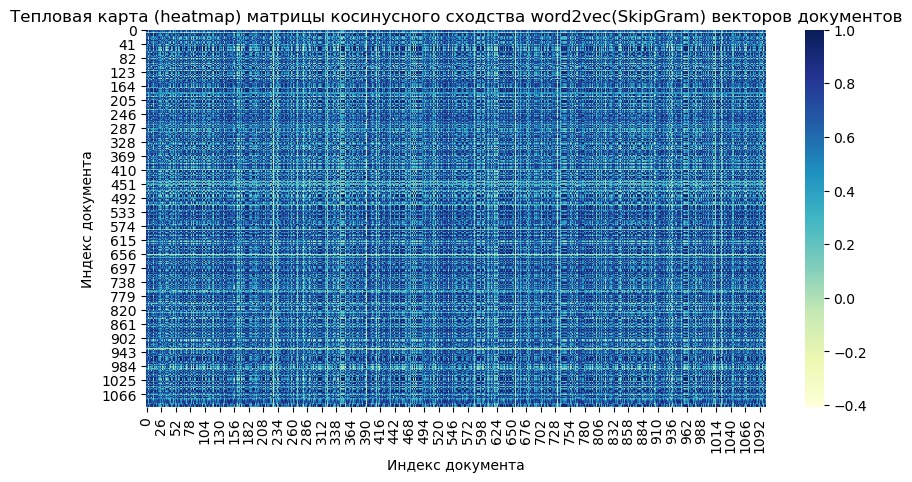

In [22]:
fig = plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(cos, cmap="YlGnBu")
plt.title('Тепловая карта (heatmap) матрицы косинусного сходства word2vec(SkipGram) векторов документов')
plt.xlabel('Индекс документа')
plt.ylabel('Индекс документа')
plt.savefig('Тепловая карта (heatmap) матрицы косинусного сходства word2vec(SkipGram) векторов документов.png');

In [23]:
vec_15= [trainDataVecs[i] for i in range(15)]
cos_15 = cosine_similarity(vec_15, vec_15)
cos_15

array([[ 1.0000001 ,  0.89598686,  0.88220346,  0.867779  ,  0.34296048,
         0.69729036,  0.8710833 ,  0.6750256 ,  0.8305186 ,  0.22285672,
         0.74800384,  0.6929378 ,  0.8708368 ,  0.5374505 ,  0.58752847],
       [ 0.89598686,  1.        ,  0.83614993,  0.8636821 ,  0.5084388 ,
         0.78246987,  0.81413126,  0.6867852 ,  0.8515562 ,  0.18309747,
         0.82584524,  0.7963303 ,  0.90286046,  0.569631  ,  0.7043009 ],
       [ 0.88220346,  0.83614993,  1.0000004 ,  0.7946093 ,  0.26919028,
         0.6480683 ,  0.88464737,  0.70242566,  0.8625852 ,  0.32369798,
         0.7033352 ,  0.6331837 ,  0.8539613 ,  0.3597507 ,  0.5156625 ],
       [ 0.867779  ,  0.8636821 ,  0.7946093 ,  0.9999997 ,  0.320404  ,
         0.69232273,  0.80824697,  0.605427  ,  0.7716074 ,  0.1603665 ,
         0.72167766,  0.70235264,  0.8372409 ,  0.70408714,  0.61327887],
       [ 0.34296048,  0.5084388 ,  0.26919028,  0.320404  ,  1.0000001 ,
         0.69550717,  0.26341188,  0.49039707, 

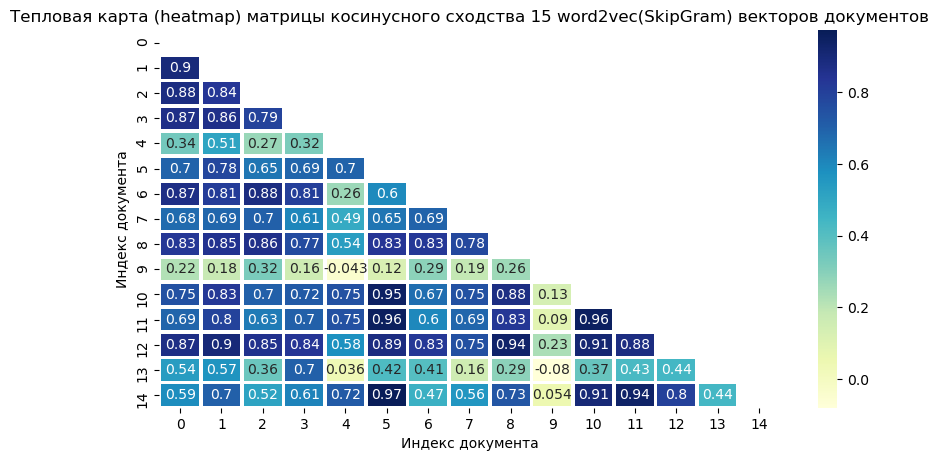

In [24]:
fig = plt.figure(figsize=(10,5),dpi=100)
matrix = np.triu(cos_15)
sns.heatmap(cos_15, cmap="YlGnBu", mask=matrix, annot=True, linewidths=2)
plt.title('Тепловая карта (heatmap) матрицы косинусного сходства 15 word2vec(SkipGram) векторов документов')
plt.xlabel('Индекс документа')
plt.ylabel('Индекс документа')
plt.savefig('Тепловая карта (heatmap) матрицы косинусного сходства 15 word2vec(SkipGram) векторов документов.png');

<Figure size 1000x500 with 0 Axes>

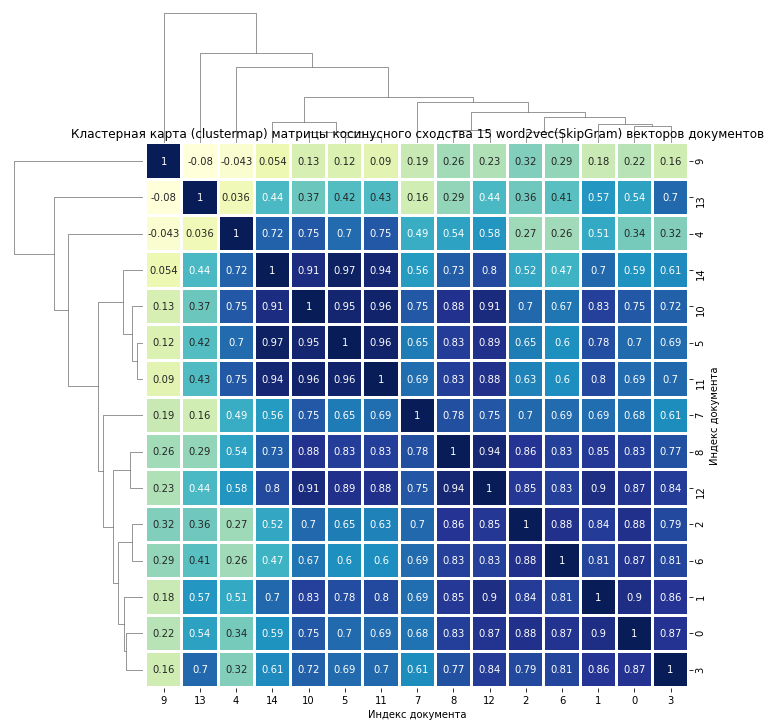

In [25]:
fig = plt.figure(figsize=(10,5),dpi=100)
sns.clustermap(cos_15, cmap="YlGnBu", annot=True, linewidths=2, cbar_pos=None)
plt.title('Кластерная карта (clustermap) матрицы косинусного сходства 15 word2vec(SkipGram) векторов документов')
plt.xlabel('Индекс документа')
plt.ylabel('Индекс документа')
plt.savefig('Кластерная карта (clustermap) матрицы косинусного сходства 15 word2vec(SkipGram) векторов документов.png');

<Figure size 1000x500 with 0 Axes>

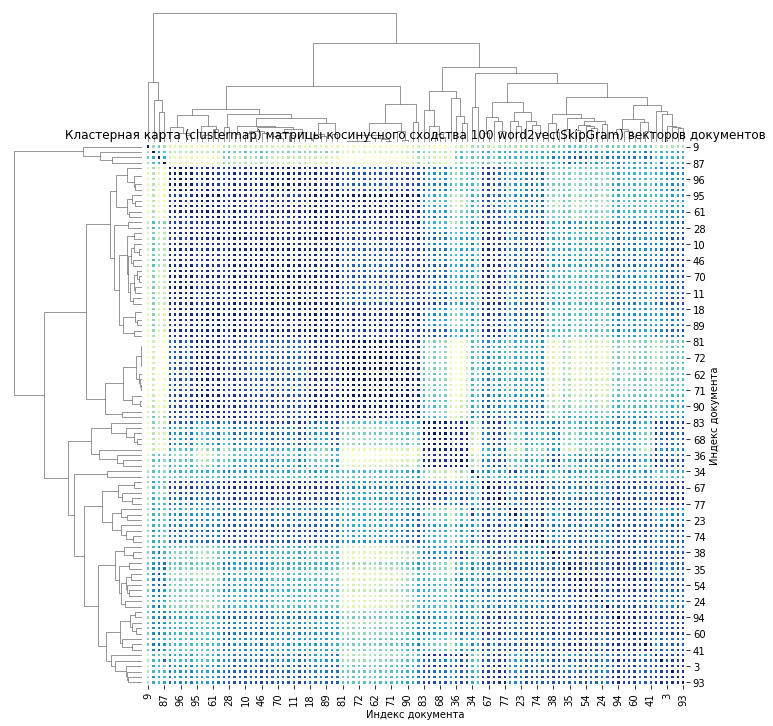

In [27]:
fig = plt.figure(figsize=(10,5),dpi=100)
vec_100= [trainDataVecs[i] for i in range(100)]
cos_100 = cosine_similarity(vec_100, vec_100)
cmap = sns.clustermap(cos_100, cmap="YlGnBu", linewidths=2, cbar_pos=None)
plt.title('Кластерная карта (clustermap) матрицы косинусного сходства 100 word2vec(SkipGram) векторов документов')
plt.xlabel('Индекс документа')
plt.ylabel('Индекс документа')
plt.savefig('Кластерная карта (clustermap) матрицы косинусного сходства 100 word2vec(SkipGram) векторов документов.png');

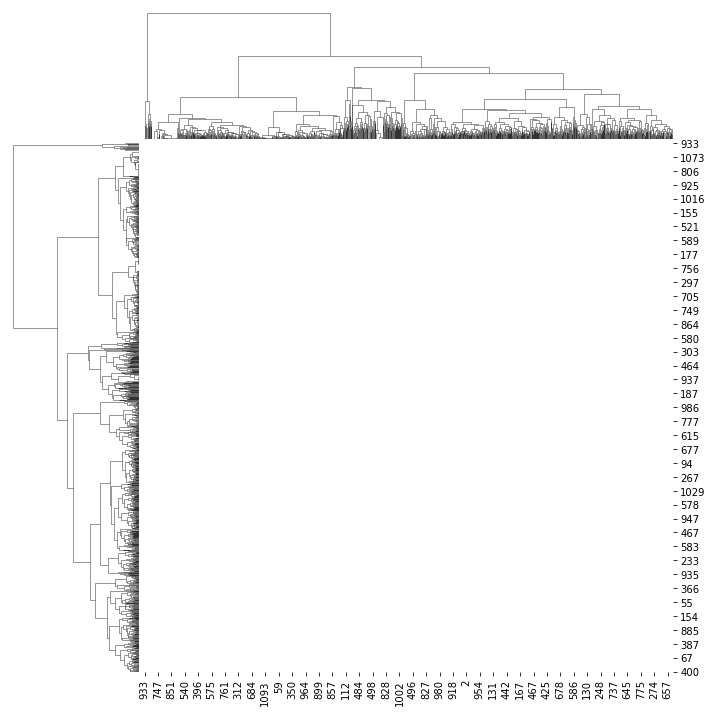

In [26]:
sns.clustermap(cos, cmap="YlGnBu", linewidths=2, cbar_pos=None)

In [18]:
df['w2v_vectors'] = list(trainDataVecs)

In [19]:
df

,label,url,text,len in symbols,len in words,w2v_vectors
0,0,http://arbitrsamara.ru/dogovor-arendy/obespech...,связь правило высокий стоимость имущество пере...,215,28,"[0.0012299898, 2.4934118e-06, 9.667178e-05, -0..."
1,0,http://inlobnya.ru/novosti/obrazovanie/vospita...,быть правительство брать обязанность выплачива...,181,26,"[0.001397721, 0.00011902514, 0.0007999876, -0...."
2,0,http://marslanov.com/otzyvy/audit-kompanii-22-...,затем потребоваться снять крупный сумма начать...,329,49,"[0.00067874126, 0.00036124935, 0.0001645788, -..."
3,0,http://mail.mycompany.su/RU/dinskaya/company/m...,каждый фирма рубрика услуга микрофинансировани...,128,18,"[0.0010088104, 0.0002933646, 0.0006745762, -0...."
4,1,https://ok.ru/ksfirst/topic/70000727225755,минимальный пакет документ минимальный_пакет п...,29,3,"[0.019442031, -0.0031735033, 0.04942851, -0.00..."
...,...,...,...,...,...,...
1099,0,http://citylife-spb.ulcraft.com/,наш фирма лидер рынок свой область наш_фирма ф...,44,9,"[0.00021718055, 0.00044294016, 0.00018622885, ..."
1100,1,https://ok.ru/avtolombards/topic/69818751358246,получение заём клиент должный предоставить мин...,147,17,"[0.009016466, 0.0006778336, 0.0053347563, -0.0..."
1101,0,http://etprf.ru/NotificationEX/id/109593,поставка оборудование эквайринг предоставление...,555,63,"[0.0012529232, 0.00023659531, 0.00073994586, -..."
1102,0,http://customsforum.ru/citizens/auto-parts/,случай непредставление соответствующий докумен...,342,34,"[0.0014774553, 0.00020671534, 0.0012239341, -0..."


### 2.3. Визуализация полученных векторов слов

In [19]:
#Выбираем 10000 слов из словаря 
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 256), dtype='float64')
word_list = []
i = 0
for word in w2v_model.wv.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 256)


In [20]:
#Сжатие векторов слов в двумерное пространство с помощью tSNE

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000, 2)


In [21]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)

In [22]:
points

,word,x,y
0,связь,-30.449549,38.687515
1,правило,-29.526154,20.819738
2,высокий,-35.744812,37.570057
3,стоимость,-30.934830,37.335785
4,имущество,-27.265486,35.621040
...,...,...,...
9995,качество_информация,24.040487,-2.523812
9996,информация_внесение,22.458569,6.963109
9997,внесение_данные,10.092210,14.968575
9998,данные_блокчейн,38.684177,-4.134916


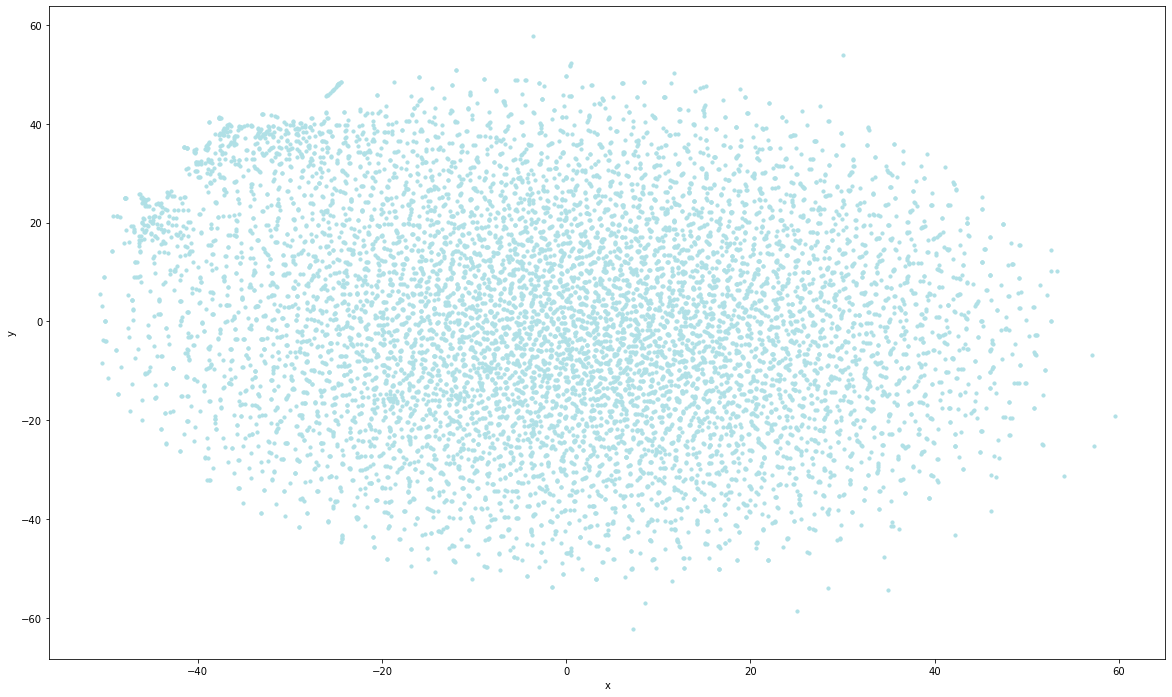

In [23]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12), c = 'powderblue')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('word2vec_vectors_sg.png');

In [24]:
def plot_region(x_bounds, y_bounds):
    slice = points[ (x_bounds[0] <= points.x) &
                   (points.x <= x_bounds[1]) &
                   (y_bounds[0] <= points.y) &
                   (points.y <= y_bounds[1])
                  ] 
    ax = slice.plot.scatter("x", "y", s=25, figsize=(10, 8), c = 'powderblue')
    for i, point in slice.iterrows():
        ax.text(point.x + 0.025, point.y + 0.015, point.word, fontsize= 10)
    plt.savefig("word2vec_words_on_OXY_sg")

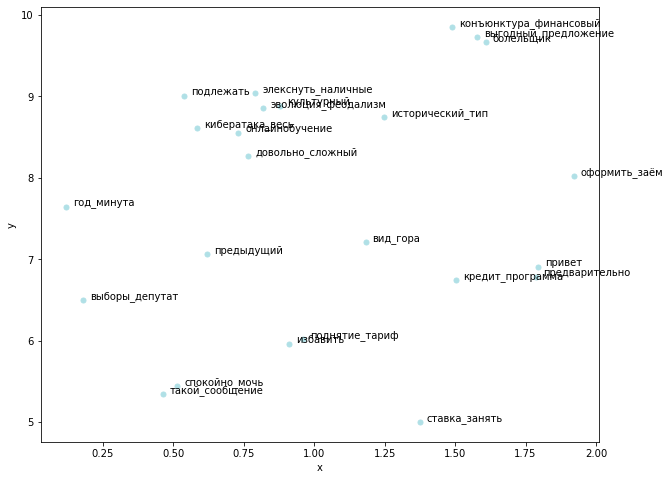

In [25]:
plot_region(x_bounds=(0, 2), y_bounds=(5, 10))

### 2.4. Визуализация полученных векторов тектов

In [17]:
text_vectors_matrix = np.ndarray(shape=(df.shape[0], 256), dtype='float64')
text_list = []
for i, text in enumerate(df['text']):
    text_vectors_matrix[i] = trainDataVecs[i]
    text_list.append(text)
print("text_vectors_matrix shape is ", text_vectors_matrix.shape)

text_vectors_matrix shape is  (1104, 256)


In [18]:
trainDataVecs = np.nan_to_num(trainDataVecs)

In [19]:
text_vectors_matrix = np.nan_to_num(text_vectors_matrix)

In [29]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
text_vectors_matrix_2d = tsne.fit_transform(text_vectors_matrix)
print("text_vectors_matrix_2d shape is ", text_vectors_matrix_2d.shape)

text_vectors_matrix_2d shape is  (1104, 2)


In [30]:
points_text = pd.DataFrame(
    [
        (text, coords[0], coords[1]) 
        for text, coords in [
            (text, text_vectors_matrix_2d[text_list.index(text)])
            for text in text_list
        ]
    ],
    columns=["text", "x", "y"]
)

In [31]:
points_text

,text,x,y
0,связь правило высокий стоимость имущество пере...,1.673136,11.242072
1,быть правительство брать обязанность выплачива...,-4.268433,5.774284
2,затем потребоваться снять крупный сумма начать...,5.610949,18.046970
3,каждый фирма рубрика услуга микрофинансировани...,0.090703,8.416478
4,минимальный пакет документ минимальный_пакет п...,-6.521128,-59.055786
...,...,...,...
1099,наш фирма лидер рынок свой область наш_фирма ф...,-8.448256,17.914349
1100,получение заём клиент должный предоставить мин...,-7.474138,-28.663795
1101,поставка оборудование эквайринг предоставление...,8.011342,13.240712
1102,случай непредставление соответствующий докумен...,6.898236,-2.241290


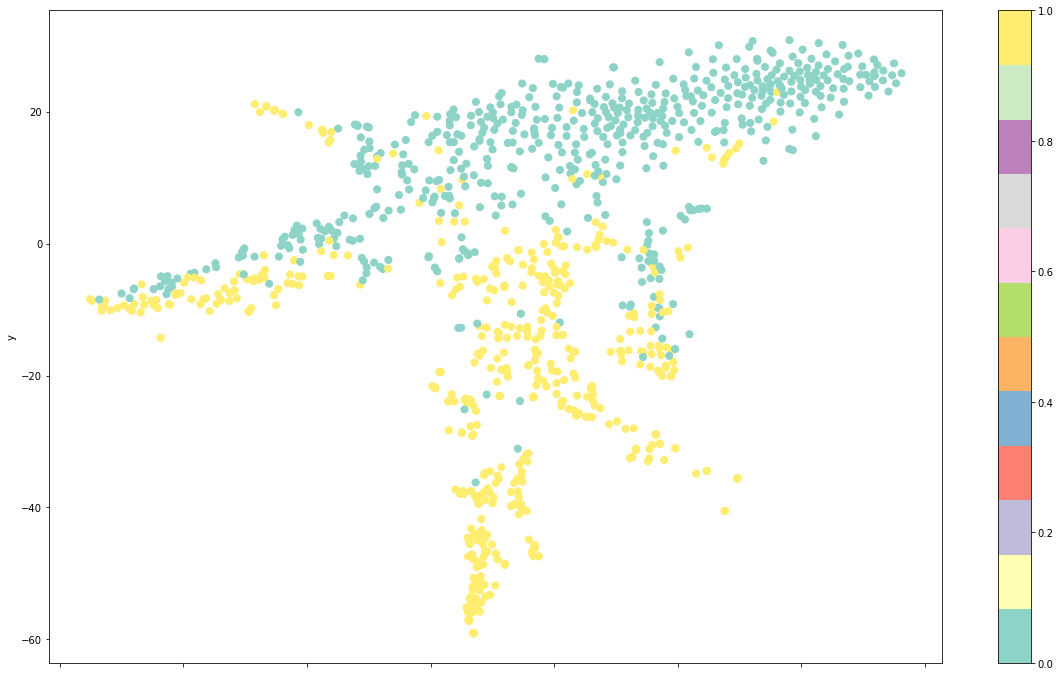

In [32]:
points_text.plot.scatter("x", "y", s=50, figsize=(20, 12), c=df['label'], colormap='Set3')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('word2vec_vectors_full_texts_sg.png');

## 3. Классификация с помощью SVM только на векторах текстов

### 3.1. Данные для обучения

In [20]:
trainDataVecs.shape

(1104, 256)

In [21]:
X = pd.DataFrame(trainDataVecs)
y = df['label']

In [22]:
X

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.001257,-0.000157,-0.000442,0.000077,-0.001484,-0.000730,-0.000051,-0.000146,0.000846,-0.000480,...,0.000234,-0.000046,-0.000342,-0.000435,0.000441,0.000714,-0.000740,0.000671,-0.001465,-0.000787
1,0.001098,-0.000115,-0.000669,0.000506,-0.001520,-0.000965,-0.000714,-0.000492,0.001180,-0.000732,...,0.000719,0.000392,-0.000834,-0.000396,0.001031,0.000351,-0.000356,0.000183,-0.001548,-0.000639
2,0.001141,-0.000120,-0.000345,0.000120,-0.000807,-0.000471,-0.000403,-0.000417,0.001205,-0.000474,...,0.000446,-0.000282,-0.000175,-0.000622,0.000283,0.000505,-0.000344,0.000452,-0.001308,-0.000478
3,0.000575,0.000170,-0.000851,-0.000461,-0.000903,-0.000885,-0.000442,-0.000383,0.001240,-0.000309,...,0.000658,-0.000024,-0.001049,-0.000238,0.000664,0.000838,-0.000046,-0.000078,-0.001304,-0.000681
4,0.049873,-0.016202,-0.024791,-0.033644,-0.043189,0.046906,-0.015155,-0.042445,0.045586,-0.035244,...,0.036081,0.004951,-0.019128,0.006336,0.005558,-0.003792,-0.011486,-0.018269,0.017184,-0.043337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0.000983,0.000510,-0.000326,0.001136,-0.001954,-0.002333,-0.000339,-0.000341,0.001465,-0.000654,...,0.001129,-0.000636,-0.000263,-0.000916,0.000305,0.001207,-0.001611,0.001418,-0.003901,-0.000419
1100,0.007742,-0.002454,-0.003807,-0.002759,-0.006609,0.002645,-0.001173,-0.004264,0.007158,-0.003749,...,0.004133,0.000778,-0.005884,-0.002268,0.003361,0.003477,0.000071,-0.001934,-0.000773,-0.005255
1101,0.000758,-0.000099,-0.000443,0.000102,-0.001067,-0.000790,-0.000398,-0.000586,0.001019,-0.000811,...,0.000703,-0.000048,0.000149,-0.000363,-0.000066,0.000573,-0.000558,0.000344,-0.001657,-0.000696
1102,0.001855,-0.000417,-0.000836,-0.000403,-0.001769,0.000112,-0.000782,-0.001198,0.001910,-0.001098,...,0.001156,0.000299,-0.000940,-0.000605,0.000637,0.000596,-0.000217,-0.000280,-0.001129,-0.000814


In [23]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1099    0
1100    1
1101    0
1102    0
1103    1
Name: label, Length: 1104, dtype: int64

### 3.2. SVM + GridSearchCV

In [24]:
param_grid =[{'kernel': ['linear'], 
               'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, 
             
             {'kernel': ['rbf'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]} ]


#{'kernel': ['poly'],  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'degree':[0, 1, 2, 3, 4, 5]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [25]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv =  RepeatedStratifiedKFold(10,3), n_jobs=-1, 
                    return_train_score=True, scoring='f1')
grid.fit(X_train, y_train)

Fitting 30 folds for each of 49 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:  1.3min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='f1', verbose=3)

In [26]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=1000, gamma=10)


In [77]:
results = pd.DataFrame(grid.cv_results_)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,split22_train_score,split23_train_score,split24_train_score,split25_train_score,split26_train_score,split27_train_score,split28_train_score,split29_train_score,mean_train_score,std_train_score
0,0.235471,0.034315,0.027133,0.004216,0.001,linear,NaN,"{'C': 0.001, 'kernel': 'linear'}",0.975000,0.962025,...,0.937143,0.932568,0.934097,0.933908,0.935438,0.935438,0.935622,0.935622,0.934182,0.003734
1,0.080918,0.007150,0.012110,0.001765,0.01,linear,NaN,"{'C': 0.01, 'kernel': 'linear'}",0.975000,0.962025,...,0.937143,0.932568,0.934097,0.933908,0.935438,0.935438,0.935622,0.935622,0.934182,0.003734
2,0.062730,0.002797,0.009174,0.000670,0.1,linear,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.975000,0.962025,...,0.937143,0.932568,0.934097,0.933908,0.935438,0.935438,0.935622,0.935622,0.934182,0.003734
3,0.058816,0.002913,0.008793,0.000778,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.975000,0.962025,...,0.937143,0.932568,0.934097,0.933908,0.935438,0.935438,0.935622,0.935622,0.934182,0.003734
4,0.059376,0.002581,0.008558,0.000619,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.975000,0.962025,...,0.944681,0.944681,0.943182,0.946023,0.944523,0.944523,0.944681,0.946176,0.945025,0.003114
5,0.066203,0.005629,0.008344,0.000543,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.975000,0.962025,...,0.958101,0.958101,0.959554,0.959441,0.960894,0.959554,0.959554,0.962448,0.959923,0.002578
6,0.131752,0.024647,0.007280,0.000425,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.987654,0.962963,...,0.976744,0.980978,0.982361,0.979536,0.979424,0.978142,0.981030,0.981030,0.979988,0.002163
7,0.238869,0.021932,0.029201,0.003265,0.001,rbf,10,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.231947,0.009753,0.028351,0.002350,0.001,rbf,1,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.227234,0.007780,0.029531,0.003171,0.001,rbf,0.1,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


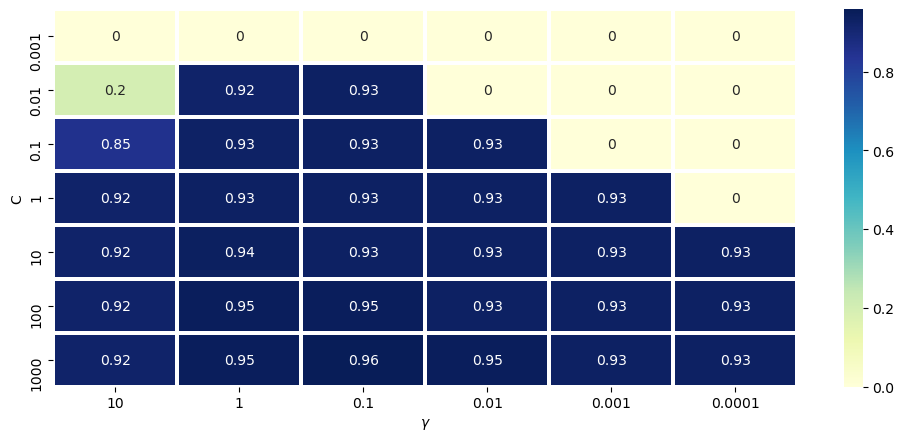

In [78]:
x1 = 10, 1, 0.1, 0.01, 0.001, 0.0001
y1 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores_rbf = np.array(results[results.param_kernel=='rbf'].mean_test_score).reshape(7,6)

fig = plt.figure(figsize=(12, 5), dpi=100)
sns.heatmap(scores_rbf, cmap="YlGnBu", annot=True, linewidths=2, xticklabels=x1, yticklabels=y1)
plt.xlabel("$\gamma$")
plt.ylabel("C")
plt.savefig("w2v_sg_heatmap_rbf.png")

In [79]:
from sklearn.model_selection import validation_curve

train_scores, valid_scores = validation_curve(grid.best_estimator_, X, y, "C",[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=10)

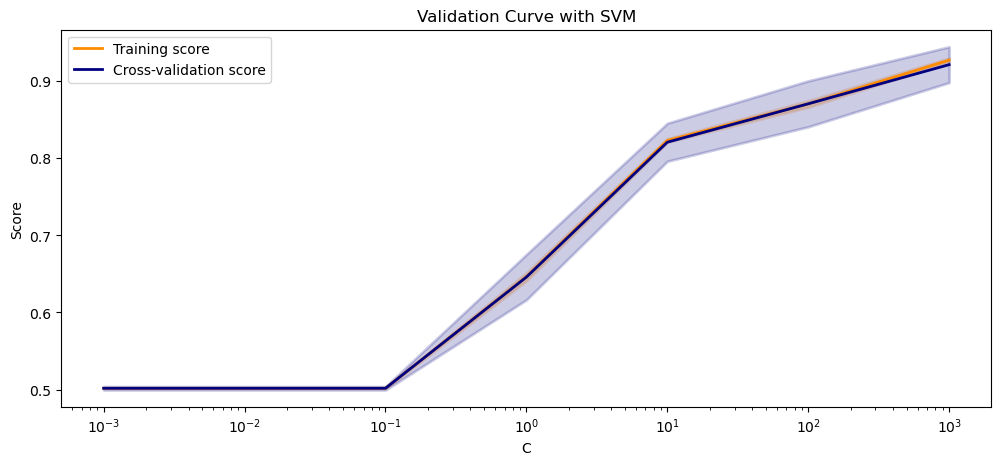

In [80]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)


fig = plt.figure(figsize=(12, 5), dpi=100)
plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [31]:
train_scores, valid_scores = validation_curve(grid.best_estimator_, X, y, "gamma",[10, 1, 0.1, 0.01, 0.001, 0.0001], cv=10)

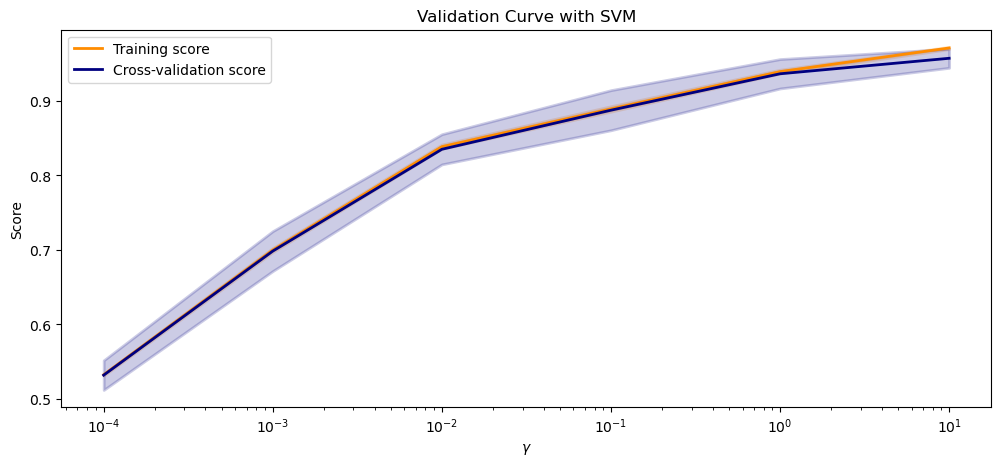

In [32]:
param_range = [10, 1, 0.1, 0.01, 0.001, 0.0001]
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)


fig = plt.figure(figsize=(12, 5), dpi=100)
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [33]:
grid_predictions = grid.predict(X_test)
print(metrics.classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       135
           1       0.96      0.98      0.97       141

    accuracy                           0.97       276
   macro avg       0.97      0.97      0.97       276
weighted avg       0.97      0.97      0.97       276



In [34]:
print ('Accuracy (test)=', metrics.accuracy_score(y_test, grid_predictions))
print ('Precision(test) =', metrics.precision_score(y_test, grid_predictions))
print ('Recall(test) =', metrics.recall_score(y_test, grid_predictions))
print ('F1-score (test)=', metrics.f1_score(y_test, grid_predictions))

Accuracy (test)= 0.967391304347826
Precision(test) = 0.9583333333333334
Recall(test) = 0.9787234042553191
F1-score (test)= 0.968421052631579


In [35]:
clf = grid.best_estimator_
pred_train = clf.predict(X_train)
print ('Accuracy (train)=', metrics.accuracy_score(y_train, pred_train))
print ('Precision(train) =', metrics.precision_score(y_train, pred_train))
print ('Recall (train)=', metrics.recall_score(y_train, pred_train))
print ('F1-score (train) =', metrics.f1_score(y_train, pred_train))

Accuracy (train)= 0.966183574879227
Precision(train) = 0.972972972972973
Recall (train)= 0.9588377723970944
F1-score (train) = 0.9658536585365853


In [36]:
#сохранение полученного классификатора 
joblib.dump(grid.best_estimator_, 'w2v_sg_SVM.pkl')

['w2v_sg_SVM.pkl']

In [37]:
scores_acc = cross_val_score(grid.best_estimator_, X, y, cv=10, scoring = 'accuracy')
scores_pre = cross_val_score(grid.best_estimator_, X, y, cv=10, scoring = 'precision')
scores_re = cross_val_score(grid.best_estimator_, X, y, cv=10, scoring = 'recall')
scores_f = cross_val_score(grid.best_estimator_, X, y, cv=10, scoring = 'f1')

In [38]:
print(scores_acc)
print(np.mean(scores_acc))

[0.98198198 0.95495495 0.94594595 0.93693694 0.96363636 0.95454545
 0.96363636 0.94545455 0.95454545 0.97272727]
0.9574365274365274


In [39]:
print(scores_pre)
print(np.mean(scores_pre))

[0.96551724 0.96363636 0.96296296 0.91525424 0.93220339 1.
 1.         0.92982456 0.96296296 0.98148148]
0.9613843200945235


In [40]:
print(scores_re)
print(np.mean(scores_re))

[1.         0.94642857 0.92857143 0.96428571 1.         0.90909091
 0.92727273 0.96363636 0.94545455 0.96363636]
0.9548376623376622


In [41]:
print(scores_f)
print(np.mean(scores_f))

[0.98245614 0.95495495 0.94545455 0.93913043 0.96491228 0.95238095
 0.96226415 0.94642857 0.95412844 0.97247706]
0.9574587535584819


In [55]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, grid_predictions)

0.9349422747398797

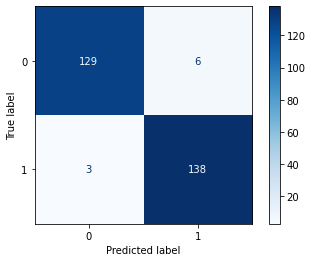

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig('w2v_sg_svm_conf_matrix.png')


In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

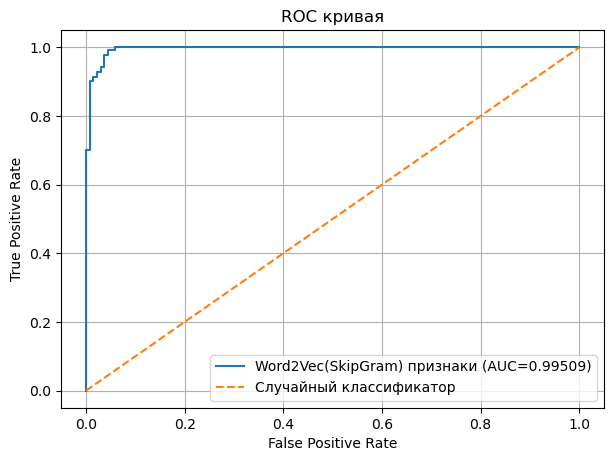

In [56]:
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = fig.add_subplot(111)

fpr, tpr, _ = roc_curve(y_test, clf.decision_function(X_test))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax, name='Word2Vec(SkipGram) признаки (AUC={0:0.5f})'.format(average_precision_score(y_test, clf.decision_function(X_test))))
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайный классификатор')
plt.legend()
plt.title("ROC кривая")
plt.grid()
plt.savefig('w2v_sg_roc_curve.png')

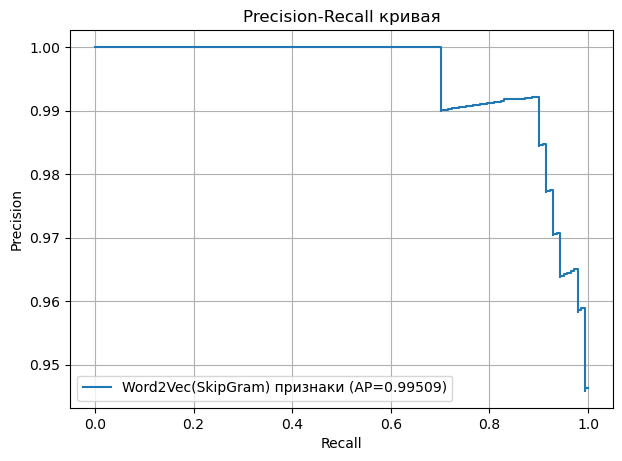

In [57]:
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = fig.add_subplot(111)

prec, recall, _ = precision_recall_curve(y_test, clf.decision_function(X_test))
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax, name='Word2Vec(SkipGram) признаки (AP={0:0.5f})'.format(average_precision_score(y_test, clf.decision_function(X_test))))

plt.title("Precision-Recall кривая")
plt.grid();
plt.savefig('w2v_sg_pr_curve.png')

Text(0.5, 1.0, 'Тепловая карта корреляции признаков')

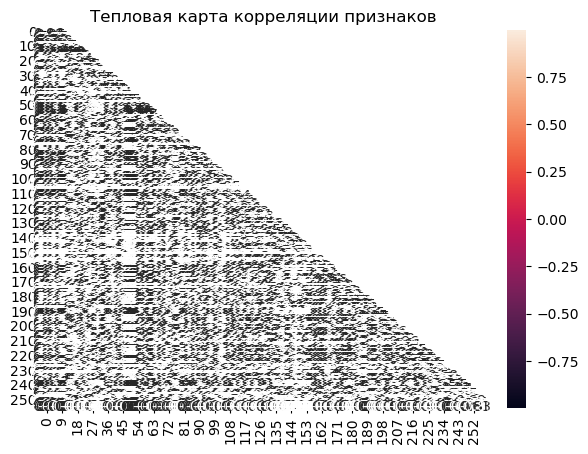

In [46]:
fig = plt.figure(figsize=(7, 5), dpi=100)
corrMatrix = X.corr()
matrix = np.triu(corrMatrix)
sns.heatmap(corrMatrix, annot=True, mask=matrix,linewidths=2)
plt.title("Тепловая карта корреляции признаков")
#plt.savefig('url_pr_curve.png')

In [47]:
X.to_csv("Word2Vec_SG_vectors.csv",index=False)

## 4. Классификация на векторах текстов с дополнительными признаками на основе URL

### 4.1. Данные для обучения с дополнительными признаками

In [65]:
df_add = pd.read_csv('additional_features_norm.csv')


In [66]:
df_add

,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,protocol,protocol_count
0,-0.839701,-0.789207,-1.000000,-1.0,-0.790660,-1.000000,-1.0,-0.655172,-1.0,-0.666667,1.0,-1.0
1,-0.530498,-0.871061,-1.000000,-1.0,-0.764895,-1.000000,-1.0,-0.586207,-1.0,-0.666667,1.0,-1.0
2,-0.337393,-0.789207,-0.834471,-1.0,-0.864734,-0.984252,-1.0,-0.724138,-1.0,-0.666667,1.0,-1.0
3,-0.538552,-0.841362,-1.000000,-0.6,-0.877617,-1.000000,-1.0,-1.000000,-1.0,-0.555556,1.0,-1.0
4,0.616934,-0.848606,-1.000000,-1.0,-0.913043,-0.889764,-1.0,-1.000000,-1.0,-0.666667,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1099,-0.538159,-0.842811,-0.634812,-0.6,-0.945250,-1.000000,-1.0,-0.931034,-1.0,-0.888889,1.0,-1.0
1100,0.616934,-0.848606,-1.000000,-1.0,-0.896940,-0.889764,-1.0,-1.000000,-1.0,-0.666667,-1.0,-1.0
1101,-0.293390,-0.951467,-1.000000,-1.0,-0.919485,-0.952756,-1.0,-1.000000,-1.0,-0.666667,1.0,-1.0
1102,-0.509478,-0.948569,-1.000000,-1.0,-0.909823,-1.000000,-1.0,-0.931034,-1.0,-0.666667,1.0,-1.0


In [67]:
X_new = X.join(df_add)

In [68]:
X_new

,0,1,2,3,4,5,6,7,8,9,...,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,protocol,protocol_count
0,0.001257,-0.000157,-0.000442,0.000077,-0.001484,-0.000730,-0.000051,-0.000146,0.000846,-0.000480,...,-1.000000,-1.0,-0.790660,-1.000000,-1.0,-0.655172,-1.0,-0.666667,1.0,-1.0
1,0.001098,-0.000115,-0.000669,0.000506,-0.001520,-0.000965,-0.000714,-0.000492,0.001180,-0.000732,...,-1.000000,-1.0,-0.764895,-1.000000,-1.0,-0.586207,-1.0,-0.666667,1.0,-1.0
2,0.001141,-0.000120,-0.000345,0.000120,-0.000807,-0.000471,-0.000403,-0.000417,0.001205,-0.000474,...,-0.834471,-1.0,-0.864734,-0.984252,-1.0,-0.724138,-1.0,-0.666667,1.0,-1.0
3,0.000575,0.000170,-0.000851,-0.000461,-0.000903,-0.000885,-0.000442,-0.000383,0.001240,-0.000309,...,-1.000000,-0.6,-0.877617,-1.000000,-1.0,-1.000000,-1.0,-0.555556,1.0,-1.0
4,0.049873,-0.016202,-0.024791,-0.033644,-0.043189,0.046906,-0.015155,-0.042445,0.045586,-0.035244,...,-1.000000,-1.0,-0.913043,-0.889764,-1.0,-1.000000,-1.0,-0.666667,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0.000983,0.000510,-0.000326,0.001136,-0.001954,-0.002333,-0.000339,-0.000341,0.001465,-0.000654,...,-0.634812,-0.6,-0.945250,-1.000000,-1.0,-0.931034,-1.0,-0.888889,1.0,-1.0
1100,0.007742,-0.002454,-0.003807,-0.002759,-0.006609,0.002645,-0.001173,-0.004264,0.007158,-0.003749,...,-1.000000,-1.0,-0.896940,-0.889764,-1.0,-1.000000,-1.0,-0.666667,-1.0,-1.0
1101,0.000758,-0.000099,-0.000443,0.000102,-0.001067,-0.000790,-0.000398,-0.000586,0.001019,-0.000811,...,-1.000000,-1.0,-0.919485,-0.952756,-1.0,-1.000000,-1.0,-0.666667,1.0,-1.0
1102,0.001855,-0.000417,-0.000836,-0.000403,-0.001769,0.000112,-0.000782,-0.001198,0.001910,-0.001098,...,-1.000000,-1.0,-0.909823,-1.000000,-1.0,-0.931034,-1.0,-0.666667,1.0,-1.0


### 4.3. Подбор параметров 

In [69]:
param_grid =[{'kernel': ['linear'], 
               'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, 
             
             {'kernel': ['rbf'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]} ]


#{'kernel': ['poly'],  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'degree':[0, 1, 2, 3, 4, 5]}

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y, test_size = 0.25, random_state = 101)

In [71]:
%%time 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = RepeatedStratifiedKFold(10,3), n_jobs=-1, 
                    return_train_score=True, scoring='f1')
grid.fit(X_train1, y_train1)

Fitting 30 folds for each of 49 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   46.0s


CPU times: user 3.21 s, sys: 558 ms, total: 3.76 s
Wall time: 51.9 s


[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:   51.7s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='f1', verbose=3)

In [72]:
print(grid.best_params_)
print(grid.best_estimator_)


{'C': 1000, 'kernel': 'linear'}
SVC(C=1000, kernel='linear')


In [73]:
results = pd.DataFrame(grid.cv_results_)
results.head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,split22_train_score,split23_train_score,split24_train_score,split25_train_score,split26_train_score,split27_train_score,split28_train_score,split29_train_score,mean_train_score,std_train_score
0,0.235471,0.034315,0.027133,0.004216,0.001,linear,NaN,"{'C': 0.001, 'kernel': 'linear'}",0.975000,0.962025,...,0.937143,0.932568,0.934097,0.933908,0.935438,0.935438,0.935622,0.935622,0.934182,0.003734
1,0.080918,0.007150,0.012110,0.001765,0.01,linear,NaN,"{'C': 0.01, 'kernel': 'linear'}",0.975000,0.962025,...,0.937143,0.932568,0.934097,0.933908,0.935438,0.935438,0.935622,0.935622,0.934182,0.003734
2,0.062730,0.002797,0.009174,0.000670,0.1,linear,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.975000,0.962025,...,0.937143,0.932568,0.934097,0.933908,0.935438,0.935438,0.935622,0.935622,0.934182,0.003734
3,0.058816,0.002913,0.008793,0.000778,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.975000,0.962025,...,0.937143,0.932568,0.934097,0.933908,0.935438,0.935438,0.935622,0.935622,0.934182,0.003734
4,0.059376,0.002581,0.008558,0.000619,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.975000,0.962025,...,0.944681,0.944681,0.943182,0.946023,0.944523,0.944523,0.944681,0.946176,0.945025,0.003114
5,0.066203,0.005629,0.008344,0.000543,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.975000,0.962025,...,0.958101,0.958101,0.959554,0.959441,0.960894,0.959554,0.959554,0.962448,0.959923,0.002578
6,0.131752,0.024647,0.007280,0.000425,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.987654,0.962963,...,0.976744,0.980978,0.982361,0.979536,0.979424,0.978142,0.981030,0.981030,0.979988,0.002163
7,0.238869,0.021932,0.029201,0.003265,0.001,rbf,10,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.231947,0.009753,0.028351,0.002350,0.001,rbf,1,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.227234,0.007780,0.029531,0.003171,0.001,rbf,0.1,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


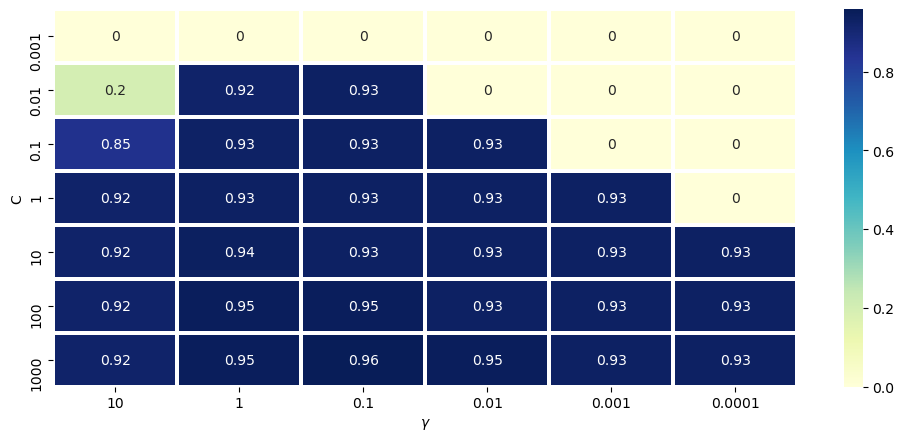

In [74]:
x1 = [10, 1, 0.1, 0.01, 0.001, 0.0001]
y1 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores_rbf = np.array(results[results.param_kernel=='rbf'].mean_test_score).reshape(7,6)

fig = plt.figure(figsize=(12, 5), dpi=100)
sns.heatmap(scores_rbf, cmap="YlGnBu", annot=True, linewidths=2, xticklabels=x1, yticklabels=y1)
plt.xlabel("$\gamma$")
plt.ylabel("C")
plt.savefig("w2v_cbow_addFeatures_heatmap_rbf.png")


In [75]:
train_scores, valid_scores = validation_curve(grid.best_estimator_, X_new, y, "C",[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=10)

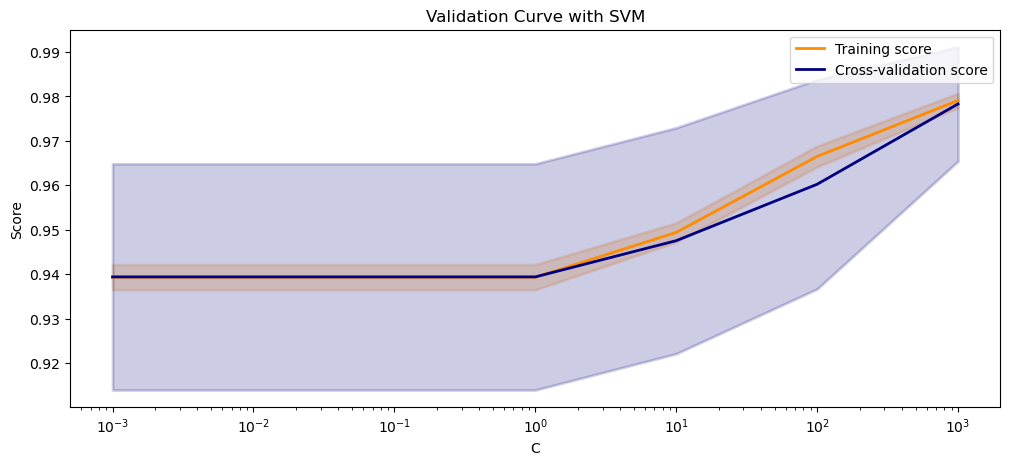

In [76]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)


fig = plt.figure(figsize=(12, 5), dpi=100)
plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [81]:
new_grid_predictions = grid.predict(X_test1)
print(metrics.classification_report(y_test1, new_grid_predictions))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       135
           1       0.99      0.96      0.97       141

    accuracy                           0.97       276
   macro avg       0.97      0.98      0.97       276
weighted avg       0.98      0.97      0.97       276



In [82]:
print ('Accuracy (test) =', metrics.accuracy_score(y_test1, new_grid_predictions))
print ('Precision (test)=', metrics.precision_score(y_test1, new_grid_predictions))
print ('Recall (test) =', metrics.recall_score(y_test1, new_grid_predictions))
print ('F1-score(test) =', metrics.f1_score(y_test1, new_grid_predictions))

Accuracy (test) = 0.9746376811594203
Precision (test)= 0.9926470588235294
Recall (test) = 0.9574468085106383
F1-score(test) = 0.9747292418772563


In [83]:
clf1 = grid.best_estimator_
pred_train = clf1.predict(X_train1)
print ('Accuracy (train)=', metrics.accuracy_score(y_train1, pred_train))
print ('Precision(train) =', metrics.precision_score(y_train1, pred_train))
print ('Recall (train)=', metrics.recall_score(y_train1, pred_train))
print ('F1-score (train) =', metrics.f1_score(y_train1, pred_train))

Accuracy (train)= 0.9818840579710145
Precision(train) = 0.9901477832512315
Recall (train)= 0.9733656174334141
F1-score (train) = 0.9816849816849816


In [84]:
#сохранение полученного классификатора 
joblib.dump(grid.best_estimator_, 'w2v_sg_SVM_with_add_features.pkl')


['w2v_sg_SVM_with_add_features.pkl']

In [85]:
scores_acc = cross_val_score(clf1, X_new, y, cv=10, scoring = 'accuracy')
scores_pre = cross_val_score(clf1, X_new, y, cv=10, scoring = 'precision')
scores_re = cross_val_score(clf1, X_new, y, cv=10, scoring = 'recall')
scores_f = cross_val_score(clf1, X_new, y, cv=10, scoring = 'f1')


In [86]:
print(scores_acc)
print(np.mean(scores_acc))


[0.97297297 0.95495495 0.98198198 0.96396396 1.         0.99090909
 0.98181818 0.99090909 0.97272727 0.97272727]
0.9782964782964785


In [87]:
print(scores_pre)
print(np.mean(scores_pre))


[0.98181818 0.98113208 1.         1.         1.         0.98214286
 1.         1.         0.98148148 1.        ]
0.9926574595914218


In [88]:
print(scores_re)
print(np.mean(scores_re))


[0.96428571 0.92857143 0.96428571 0.92857143 1.         1.
 0.96363636 0.98181818 0.96363636 0.94545455]
0.964025974025974


In [91]:
print(scores_f)
print(np.mean(scores_f))


[0.97297297 0.95412844 0.98181818 0.96296296 1.         0.99099099
 0.98148148 0.99082569 0.97247706 0.97196262]
0.977962039970957


In [89]:
matthews_corrcoef(y_test, new_grid_predictions)


0.9499146503442263

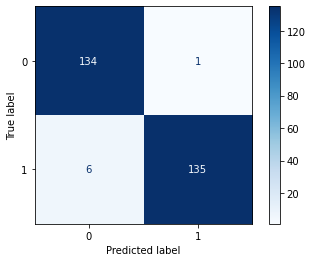

In [92]:
y_pred = clf1.predict(X_test1)
cm = confusion_matrix(y_test1, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig('w2v_sg_addFeatures_svm_conf_matrix.png')


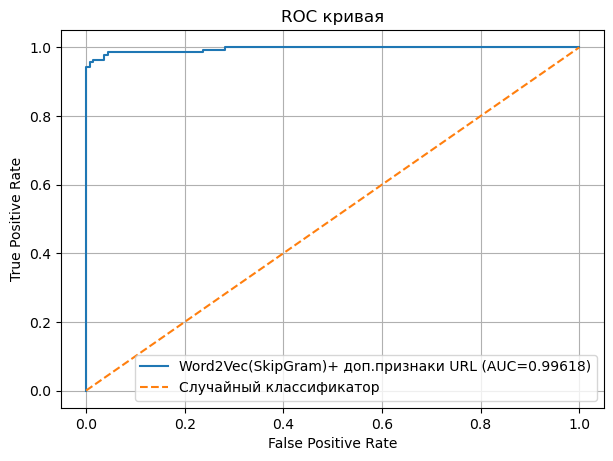

In [94]:
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = fig.add_subplot(111)

fpr, tpr, _ = roc_curve(y_test1, clf1.decision_function(X_test1))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax, name='Word2Vec(SkipGram)+ доп.признаки URL (AUC={0:0.5f})'.format(average_precision_score(y_test1, clf1.decision_function(X_test1))))
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайный классификатор')
plt.legend()
plt.title("ROC кривая")
plt.grid()
plt.savefig('w2v_sg_addFeatures_roc_curve.png')

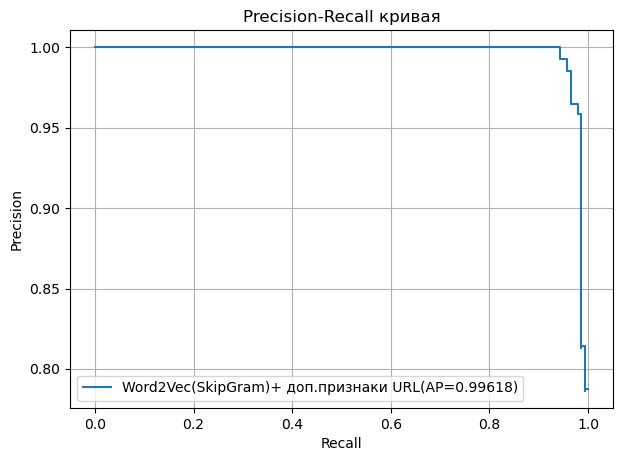

In [95]:
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = fig.add_subplot(111)

prec, recall, _ = precision_recall_curve(y_test, clf1.decision_function(X_test1))
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax, name='Word2Vec(SkipGram)+ доп.признаки URL(AP={0:0.5f})'.format(average_precision_score(y_test1, clf1.decision_function(X_test1))))

plt.title("Precision-Recall кривая")
plt.grid();
plt.savefig('w2v_sg_addFeatures_pr_curve.png')

In [96]:
X_new.to_csv("Word2Vec_SG_vectors_withAddFeatures.csv",index=False)
